In [1]:
from scipy import misc
import numpy as np
import tensorflow.compat.v1 as tf
import random
import matplotlib.pyplot as plt
import matplotlib as mp

In [2]:
import imageio.v2 as imageio

In [3]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''

    # IMPLEMENT YOUR WEIGHT_VARIABLE HERE
    weight = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(weight)
    return W

In [5]:
def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters
    :return: a tensor variable for biases with initial values
    '''

    # IMPLEMENT YOUR BIAS_VARIABLE HERE
    bias = tf.constant(0.1, shape=shape)

    return tf.Variable(bias)

In [6]:
def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    # IMPLEMENT YOUR CONV2D HERE
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    return h_conv

In [7]:
def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''

    # IMPLEMENT YOUR MAX_POOL_2X2 HERE
    h_max = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return h_max

In [8]:
import imageio

In [10]:
ntrain =  1000# per class
ntest =  100# per class
nclass =  10# number of classes
imsize = 28
nchannels = 1
batchsize = 50

Train = np.zeros((ntrain*nclass,imsize,imsize,nchannels))
Test = np.zeros((ntest*nclass,imsize,imsize,nchannels))
LTrain = np.zeros((ntrain*nclass,nclass))
LTest = np.zeros((ntest*nclass,nclass))

itrain = -1
itest = -1
for iclass in range(0, nclass):
    for isample in range(0, ntrain):
        path = './CIFAR10/Train/%d/Image%05d.png' % (iclass,isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float)/255
        itrain += 1
        Train[itrain,:,:,0] = im
        LTrain[itrain,iclass] = 1 # 1-hot lable
    for isample in range(0, ntest):
        path = './CIFAR10/Test/%d/Image%05d.png' % (iclass,isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float)/255
        itest += 1
        Test[itest,:,:,0] = im
        LTest[itest,iclass] = 1 # 1-hot lable

sess = tf.InteractiveSession()

tf_data = tf.placeholder(tf.float32, shape=[None, imsize, imsize, nchannels])  #tf variable for the data, remember shape is [None, width, height, numberOfChannels]
tf_labels = tf.placeholder(tf.float32, shape=[None, nclass])  #tf variable for labels

/Users/johnnyyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
/Users/johnnyyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
2022-11-01 14:33:45.039182: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [39]:
# --------------------------------------------------
# model
# create your model

# 1st layer 
# 5 x 5 and 32
W_conv1 = weight_variable([5, 5, nchannels, 32])
b_conv1 = bias_variable([32])
# ReLu
h_conv1 = tf.nn.relu(conv2d(tf_data, W_conv1) + b_conv1)
# Max Pooling subsampling by 2
h_pool1 = max_pool_2x2(h_conv1)


# 2nd layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.tanh(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 1st fully connected
# 7 x 7 output 1024
W_fullyconnect1 = weight_variable([7*7*64, 1024])
b_fullyconnect1 = bias_variable([1024])
# flatten h_pool2
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
# tf ReLu
h_fullyconnect1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fullyconnect1) + b_fullyconnect1)

# Dropout 
placehold = tf.placeholder(tf.float32)
h_fullyconnect1_drop = tf.nn.dropout(h_fullyconnect1, placehold)

# Fully connected with 1024 input, output 10 classes
W_fullyconnect2 = weight_variable([1024, 10])
b_fullyconnect2 = bias_variable([10])
h_fullyconnect2 = tf.matmul(h_fullyconnect1_drop, W_fullyconnect2) + b_fullyconnect2




# --------------------------------------------------
# loss
#set up the loss, optimization, evaluation, and accuracy


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=tf_labels, logits=h_fullyconnect2)
cross_entropy = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
# correct_prediction = tf.equal(tf.argmax(h_fc2, 1), tf_labels)
# correct_prediction = tf.cast(correct_prediction, tf.float32)
correct_prediction = tf.equal(tf.argmax(h_fullyconnect2, 1), tf.argmax(tf_labels, 1))
# accuracy = tf.reduce_mean(correct_prediction)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# --------------------------------------------------
# optimization
# optimizer = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)


# # Predict
# pred = tf.equal(tf.argmax(h_fullyconnect2, 1), tf.argmax(tf_labels, 1))
# accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

# ---------------------------------------------------
train_acc_result = []
test_acc_result = []
train_loss_result = []
test_loss_result = []
sess.run(tf.initialize_all_variables())
batch_xs = np.zeros((batchsize, imsize, imsize, nchannels))#setup as [batchsize, width, height, numberOfChannels] and use np.zeros()
batch_ys = np.zeros((batchsize, nclass))#setup as [batchsize, the how many classes] 
for i in range(500): # try a small iteration size once it works then continue
    perm = np.arange(ntrain*nclass)
    np.random.shuffle(perm)
    for j in range(batchsize):
        batch_xs[j,:,:,:] = Train[perm[j],:,:,:]
        batch_ys[j,:] = LTrain[perm[j],:]
    if i%10 == 0:
        train_acc = accuracy.eval(feed_dict={tf_data: Train, tf_labels: LTrain,placehold: 0.5})
        train_acc_result.append(train_acc) 
        # Test acc
        test_acc = accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest,placehold: 0.5})
        test_acc_result.append(test_acc)
        # Train loss
        train_loss = cross_entropy.eval(feed_dict={tf_data: Train, tf_labels: LTrain,placehold: 0.5})
        train_loss_result.append(train_loss)
        # Test loss
        test_loss = cross_entropy.eval(feed_dict={tf_data: Test, tf_labels: LTest,placehold: 0.5})
        test_loss_result.append(test_loss)
    optimizer.run(feed_dict={tf_data:batch_xs, tf_labels:batch_ys, placehold: 0.5}) # dropout only during training

# --------------------------------------------------
# test


# conv1 = h_conv1.eval(feed_dict = {tf_data: Test, tf_labels: LTest, placehold: 0.5})
# conv2 = h_conv2.eval(feed_dict = {tf_data: Test, tf_labels: LTest, placehold: 0.5})
print("test accuracy %g" % accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, placehold: 0.5}))


#sess.close()

test accuracy 0.382


Text(0.5, 1.0, 'train accuracy ')

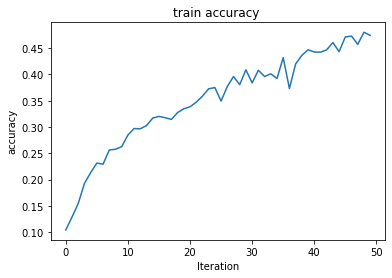

In [40]:

fig, axs = plt.subplots()
axs.plot(train_acc_result)
axs.set_xlabel("Iteration")
axs.set_ylabel("accuracy")
axs.set_title("train accuracy ")


Text(0.5, 1.0, 'train accuracy ')

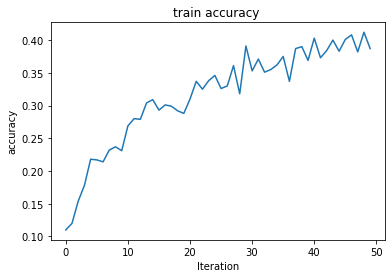

In [41]:
fig, axs = plt.subplots()
axs.plot(test_acc_result)
axs.set_xlabel("Iteration")
axs.set_ylabel("accuracy")
axs.set_title("train accuracy ")

Text(0.5, 1.0, 'train accuracy ')

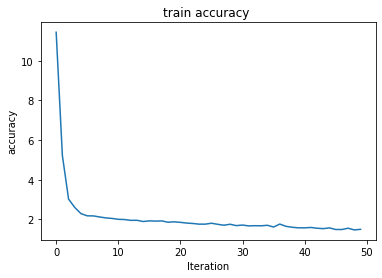

In [42]:
fig, axs = plt.subplots()
axs.plot(train_loss_result)
axs.set_xlabel("Iteration")
axs.set_ylabel("accuracy")
axs.set_title("train accuracy ")

Text(0.5, 1.0, 'train accuracy ')

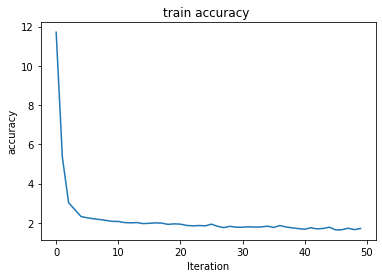

In [43]:
fig, axs = plt.subplots()
axs.plot(test_loss_result)
axs.set_xlabel("Iteration")
axs.set_ylabel("accuracy")
axs.set_title("train accuracy ")

In [26]:
weights1 = W_conv1.eval()

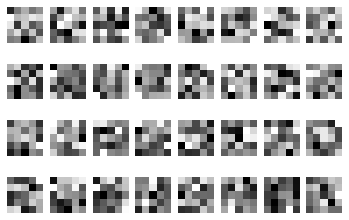

In [28]:
plt.figure(1)
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(weights1[:, :, 0, i], cmap='gray')
    plt.axis('off')

In [44]:
fst = h_conv1.eval(feed_dict = {tf_data: Test, tf_labels: LTest, placehold: 0.5})

In [45]:
print("Statistics of The Activation on the Convolutional Layer")
print("Max" + str(np.max(fst)))
print("Min" + str(np.min(fst)))
print("Mean" + str(np.mean(fst)))
print("Variance" + str(np.var(fst)))
print("Standard Deviation" + str(np.std(fst)))

Statistics of The Activation on the Convolutional Layer
Max0.72225666
Min0.0
Mean0.043309703
Variance0.0045449194
Standard Deviation0.06741602


In [46]:
snd = h_conv2.eval(feed_dict = {tf_data: Test, tf_labels: LTest, placehold: 0.5})

In [38]:
print("Statistics of The Activation on the Convolutional Layer")
print("Max" + str(np.max(snd)))
print("Min" + str(np.min(snd)))
print("Mean" + str(np.mean(snd)))
print("Variance" + str(np.var(snd)))
print("Standard Deviation" + str(np.std(snd)))

Statistics of The Activation on the Convolutional Layer
Max0.91916513
Min-0.94889915
Mean-0.08852753
Variance0.08257256
Standard Deviation0.2873544
